# 데이터 분석 및 시각화 실습

## 파이썬을 이용한 족압 데이터 분석 및 시각화

### 강의 목표

**실제 데이터를 활용한 분석 실습** 진행

데이터 분석: 단순 코드 작성이 아닌, **문제 정의 → 데이터 수집 → 전처리 → 분석 → 결론 도출**의 체계적 프로세스

### 기대 효과

본 강의 완료 시:

1. **Python 데이터 분석 환경** 구축 및 활용 가능
2. **실제 센서 데이터** (족압 데이터) 분석 방법 습득
3. **통계적 가설검정** 원리 이해 및 해석 가능
4. **AI 도구** 활용을 통한 분석 효율 향상

### 실습 데이터 소개

사용 데이터: **에이아이트론 스마트매트** 수집 족압(발바닥 압력) 데이터
활용 분야: 재활 치료, 운동 처방, 자세 교정 등 헬스케어

**핵심 질문**: "운동 프로그램이 좌우 균형 개선에 효과가 있는가?"

### 강의 전체 흐름

| 장 | 제목 | 핵심 내용 |
|:---:|------|----------|
| **1** | 환경 설정 | Python, 라이브러리, 한글 폰트 |
| **2** | 전처리 & EDA | 데이터 로드, 탐색적 분석 |
| **3** | 시각화 | Heatmap, Boxplot, Violin Plot |
| **4** | 통계 검정 | t-test, ANOVA, 사후분석 |
| **5** | AI 활용 | 프롬프트 엔지니어링 |
| **6** | ML 입문 | 로지스틱 회귀, 혼동행렬 |
| **7** | 과제 & 마무리 | 종합 실습, Q&A |

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 1. 데이터 분석 개요 및 환경 설정

### 1.1 데이터 분석 정의

데이터 분석: **원시 데이터에서 의미 있는 정보와 인사이트를 추출**하는 과정

### 데이터 분석 5단계 프로세스

| 단계 | 이름 | 설명 | 본 실습 예시 |
|:---:|------|------|-------------|
| **1** | 문제 정의 | 무엇을 알고 싶은가? | "좌우 균형이 개선되는가?" |
| **2** | 데이터 수집 | 어디서 얻을 수 있는가? | 스마트매트 족압 데이터 수집 |
| **3** | 데이터 전처리 | 분석 가능한 형태로 정제 | 결측치 제거, 형식 변환 |
| **4** | 분석 & 시각화 | 패턴 발견, 가설 검증 | Heatmap, t-test |
| **5** | 결론 도출 | 인사이트 정리, 의사결정 | 운동 효과 통계적 검증 |

### Python 선택 이유

Python: 데이터 분석 분야에서 가장 널리 사용되는 언어

- **NumPy**: 빠른 수치 연산
- **Pandas**: 직관적인 데이터 조작
- **Matplotlib/Seaborn**: 출판 수준의 시각화
- **SciPy**: 과학적 통계 검정

### 본 실습 학습 내용

| 단계 | 내용 | 사용 도구 |
|------|------|-----------|
| 전처리 | 데이터 불러오기, 정제 | Pandas |
| 탐색 | 기술통계, 분포 확인 | Pandas, NumPy |
| 시각화 | Heatmap, Boxplot | Matplotlib, Seaborn |
| 통계검정 | t-test, ANOVA | SciPy |
| AI 활용 | 코드 생성, 해석 | ChatGPT, Claude |

### 1.2 Python 데이터 분석 라이브러리

| 라이브러리 | 역할 | 주요 기능 |
|------------|------|-----------|
| **NumPy** | 수치 연산 | 배열 연산, 수학 함수 |
| **Pandas** | 데이터 조작 | DataFrame, 그룹화, 피벗 |
| **Matplotlib** | 기본 시각화 | 선 그래프, 막대 그래프 |
| **Seaborn** | 통계 시각화 | Heatmap, Boxplot, Violin |
| **SciPy** | 통계 분석 | t-test, ANOVA, 상관분석 |

In [ ]:
# 필수 라이브러리 설치 (필요시 주석 해제)
# !pip install numpy pandas matplotlib seaborn scipy

In [1]:
# 데이터 분석 라이브러리
import numpy as np
import pandas as pd

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 통계 분석 라이브러리
from scipy import stats

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')


# 기본 스타일 설정
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

# === 한글 폰트 설정 ===
import platform

if platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:  # Linux (Colab 포함)
    plt.rcParams['font.family'] = 'NanumGothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print("라이브러리 및 한글 폰트 설정 완료")

라이브러리 및 한글 폰트 설정 완료


## 2. 데이터 불러오기 및 전처리

### 2.1 탐색적 데이터 분석 (EDA)

**EDA (Exploratory Data Analysis)**: 시각화와 통계량을 활용하여 데이터 특성을 파악하는 분석 방법

새로운 도시 방문 시 지도를 먼저 살펴보는 것처럼, 데이터 분석에서도 **전체 구조를 파악한 후** 세부 분석 진행
> 일반적으로, 기초통계학의 첫 부분인 "기술통계량"과, "데이터 시각화"가 이러한 탐색적 데이터 분석의 과정

#### EDA의 목적

1. **데이터 구조 파악**: 행/열 수, 변수 타입
2. **결측치/이상치 확인**: 분석 전 데이터 품질 점검
3. **분포 확인**: 정규분포 여부, 편향 확인
4. **관계 탐색**: 변수 간 상관관계

#### 주요 EDA 함수

| 함수 | 설명 |
|------|------|
| `df.head()` | 처음 5행 확인 |
| `df.info()` | 데이터 타입, 결측치 정보 |
| `df.describe()` | 기술통계량 (평균, 표준편차, 사분위수) |
| `df.value_counts()` | 범주별 빈도 |
| `df.groupby()` | 그룹별 집계 |

### 2.2 족압 데이터셋 로드

실제 스마트매트 측정 데이터를 로드.

**데이터 스키마** (19개 컬럼):
- `user_id`: 사용자 ID
- `session_id`: 세션 ID
- `condition`: 운동 조건 (before/after)
- `left_pressure`, `right_pressure`: 좌/우 발 압력 (gf/cm²)
- `balance_ratio`: 좌우 균형 비율 (1.0 = 완벽한 균형)
- `grade`: 운동 평가 등급 (A/B/C/D)
- `age_group`, `gender`, `exercise_type`, `bmi_category` 등

In [2]:
# 족압 데이터 로드 (50만 행)
df = pd.read_csv('foot_pressure_demo.csv')

print(f"데이터 로드 완료: {len(df):,}행 x {len(df.columns)}열")
print(f"사용자 수: {df['user_id'].nunique():,}명")
print(f"세션 수: {df['session_id'].nunique():,}개")
print(f"조건: {df['condition'].unique()}")

데이터 로드 완료: 500,000행 x 19열
사용자 수: 33,035명
세션 수: 250,000개
조건: ['before' 'after']


In [ ]:
# 시간상, 만개 정도 데이터만 샘플링해서 쓴다.

# 세션 ID 기준으로 5,000개 세션 샘플링 (before/after 쌍 유지 → 약 10,000행)
sampled_sessions = df['session_id'].unique()
sampled_sessions = np.random.choice(sampled_sessions, size=5000, replace=False)
df = df[df['session_id'].isin(sampled_sessions)]

print(f"데이터 로드 완료: {len(df):,}행 x {len(df.columns)}열")
print(f"사용자 수: {df['user_id'].nunique():,}명")
print(f"세션 수: {df['session_id'].nunique():,}개")
print(f"조건: {df['condition'].unique()}")

데이터 로드 완료: 10,000행 x 19열
사용자 수: 4,573명
세션 수: 5,000개
조건: ['before' 'after']


### 2.3 데이터 확인

In [ ]:
# 데이터 미리보기
print("=== 데이터 미리보기 (처음 10행) ===")
df.head(10)

=== 데이터 미리보기 (처음 10행) ===


,record_id,user_id,session_id,timestamp,condition,left_pressure,right_pressure,balance_ratio,step_count,grade,age_group,gender,exercise_type,bmi_category,injury_history,season,time_of_day,device_type,exercise_frequency
176,176,12445,89,2024-08-31 16:58:00,before,530.74,604.25,0.905,157,A,10s,M,달리기,과체중,False,여름,오후,매트B,주3회
177,177,12445,89,2024-08-31 17:31:00,after,531.03,631.41,0.914,168,D,10s,M,달리기,과체중,False,여름,오후,매트B,주3회
238,238,38866,120,2024-12-21 07:55:00,before,492.20,474.26,1.072,89,B,50s+,M,스텝,정상,False,가을,아침,매트B,주3회
239,239,38866,120,2024-12-21 08:49:00,after,515.66,463.48,1.047,102,A,50s+,M,스텝,정상,False,가을,아침,매트B,주3회
430,430,45538,216,2024-02-15 13:46:00,before,484.00,470.69,0.986,68,A,10s,M,걷기,정상,False,가을,저녁,매트B,주1회
431,431,45538,216,2024-02-15 14:27:00,after,538.96,473.41,1.008,84,A,10s,M,걷기,정상,False,가을,저녁,매트B,주1회
476,476,18388,239,2024-04-06 18:22:00,before,540.99,535.57,0.888,85,D,30s,M,스텝,과체중,False,여름,오후,매트A,주3회
477,477,18388,239,2024-04-06 18:58:00,after,513.45,581.86,0.941,97,B,30s,M,스텝,과체중,False,여름,오후,매트A,주3회
998,998,24438,500,2024-05-21 18:37:00,before,537.57,549.68,1.030,89,B,30s,M,스텝,정상,False,가을,아침,매트A,매일
999,999,24438,500,2024-05-21 19:36:00,after,532.72,558.22,1.008,100,A,30s,M,스텝,정상,False,가을,아침,매트A,매일


In [ ]:
# 데이터 타입 확인
print("=== 데이터 타입 ===")
print(df.dtypes)

=== 데이터 타입 ===
record_id               int64
user_id                 int64
session_id              int64
timestamp              object
condition              object
left_pressure         float64
right_pressure        float64
balance_ratio         float64
step_count              int64
grade                  object
age_group              object
gender                 object
exercise_type          object
bmi_category           object
injury_history           bool
season                 object
time_of_day            object
device_type            object
exercise_frequency     object
dtype: object


In [ ]:
# 결측치 확인
print("=== 결측치 확인 ===")
print(df.isnull().sum())

=== 결측치 확인 ===
record_id             0
user_id               0
session_id            0
timestamp             0
condition             0
left_pressure         0
right_pressure        0
balance_ratio         0
step_count            0
grade                 0
age_group             0
gender                0
exercise_type         0
bmi_category          0
injury_history        0
season                0
time_of_day           0
device_type           0
exercise_frequency    0
dtype: int64


### 2.4 기본 탐색적 데이터 분석 (EDA)

In [3]:
# 기술통계량
print("=== 전체 기술통계량 ===")
df.describe()

=== 전체 기술통계량 ===


,record_id,user_id,session_id,left_pressure,right_pressure,balance_ratio,step_count
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,249999.500000,24994.354780,125000.500000,499.864365,511.657651,0.988631,98.933226
std,144337.711634,14412.492571,72168.855817,44.726449,68.316497,0.071092,40.112529
min,0.000000,1.000000,1.000000,291.210000,253.060000,0.750000,8.000000
25%,124999.750000,12462.000000,62500.750000,469.510000,464.270000,0.943000,67.000000
50%,249999.500000,24997.000000,125000.500000,499.570000,507.800000,0.989000,93.000000
75%,374999.250000,37525.000000,187500.250000,529.760000,554.730000,1.035000,130.000000
max,499999.000000,49999.000000,250000.000000,716.720000,870.320000,1.250000,213.000000


In [ ]:
# 조건별 기술통계량 (운동 전/후)
print("=== 조건별(운동 전/후) 기술통계량 ===")
df.groupby('condition')[['left_pressure', 'right_pressure', 'balance_ratio']].agg(['mean', 'std', 'min', 'max'])

=== 조건별(운동 전/후) 기술통계량 ===


left_pressure                           right_pressure             \
                   mean       std     min     max           mean        std   
condition                                                                     
after        499.915976  47.12858  346.22  683.05     512.275322  70.190961   
before       500.134822  41.34269  362.37  642.40     510.196740  66.912614   

                          balance_ratio                        
              min     max          mean       std   min   max  
condition                                                      
after      291.13  798.27      0.991796  0.056461  0.85  1.15  
before     285.63  810.18      0.986843  0.083148  0.75  1.25

In [ ]:
# 등급별 분포
print("=== 조건별 등급 분포 ===")
grade_dist = pd.crosstab(df['condition'], df['grade'], margins=True)
print(grade_dist)

=== 조건별 등급 분포 ===
grade         A     B     C     D    All
condition                               
after      1915  1564  1047   474   5000
before     1167  1416  1327  1090   5000
All        3082  2980  2374  1564  10000


### 2.5 데이터 형식 변환 (Wide Format)

#### Long Format vs Wide Format

데이터 형식의 이해는 분석 방법 선택에 필수적.

| 형식 | 특징 | 용도 |
|------|------|------|
| **Long** | 하나의 관측값이 한 행 | 시각화, 그룹 비교 |
| **Wide** | 한 대상의 여러 측정이 한 행 | 대응표본 분석 |

> `pivot()` 함수로 데이터를 변환하는 이유: 대응표본 t-검정에서 같은 사용자의 운동 전/후를 직접 비교해야 하기 때문

In [ ]:
# 피벗 테이블 생성 (사용자별 운동 전/후 비교용)
# session_id를 기준으로 피벗 (각 세션에 before/after 쌍 존재)
df_wide = df.pivot_table(
    index=['user_id', 'session_id'],
    columns='condition',
    values=['left_pressure', 'right_pressure', 'balance_ratio'],
    aggfunc='mean'
).reset_index()

# 컬럼명 평탄화
df_wide.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in df_wide.columns]

print(f"Wide Format 변환 완료: {len(df_wide):,}행")
print("\n컬럼 목록:")
print(df_wide.columns.tolist())
df_wide.head()

Wide Format 변환 완료: 5,000행

컬럼 목록:
['user_id', 'session_id', 'balance_ratio_after', 'balance_ratio_before', 'left_pressure_after', 'left_pressure_before', 'right_pressure_after', 'right_pressure_before']


,user_id,session_id,balance_ratio_after,balance_ratio_before,left_pressure_after,left_pressure_before,right_pressure_after,right_pressure_before
0,8,37641,1.011,1.043,433.50,456.04,446.01,412.99
1,15,228872,0.975,0.968,509.38,519.28,562.09,535.89
2,17,19394,0.964,0.956,511.19,513.20,548.35,544.30
3,51,26242,0.994,0.958,416.28,380.20,435.49,424.71
4,61,186642,1.024,1.062,469.63,471.30,456.95,444.22


In [ ]:
# 균형 편차 계산 (1.0에서 얼마나 벗어났는지)
df_wide['balance_dev_before'] = abs(df_wide['balance_ratio_before'] - 1.0)
df_wide['balance_dev_after'] = abs(df_wide['balance_ratio_after'] - 1.0)

print("균형 편차 컬럼 추가 완료")
print(f"운동 전 균형 편차 평균: {df_wide['balance_dev_before'].mean():.4f}")
print(f"운동 후 균형 편차 평균: {df_wide['balance_dev_after'].mean():.4f}")

균형 편차 컬럼 추가 완료
운동 전 균형 편차 평균: 0.0671
운동 후 균형 편차 평균: 0.0455


### 한번 해보기

**[과제 2-1] 연령대별 균형 비율 분석** (기초)
- `age_group` 컬럼 활용
- 연령대별 `balance_ratio` 평균 및 표준편차 계산
- 결과를 표 형태로 출력

**힌트**: `df.groupby('age_group')['balance_ratio'].agg(['mean', 'std'])`




**[과제 2-2] 운동 빈도와 등급 관계 탐색** (응용)
- `exercise_frequency`와 `grade`의 교차표(crosstab) 생성
- 어떤 패턴이 보이는지 해석

**힌트**: `pd.crosstab(df['exercise_frequency'], df['grade'], normalize='index')`

EDA에서 확인한 내용:
- 50만 행, 19개 컬럼의 대용량 데이터
- 결측치 없음 (데이터 품질 양호)
- 운동 후 균형 비율이 1.0에 더 가까움

기술통계만으로도 **운동 후 균형이 개선되는 경향** 확인 가능. 하지만 숫자만으로는 직관적 이해 어려움

> "숫자를 그림으로 바꾸면, 패턴이 보인다"

## 3. 족압 데이터 시각화 - Heatmap

### 시각화의 목적

**시각화**: 데이터의 패턴을 직관적으로 전달하는 강력한 도구

3장에서 다루는 시각화 기법:

| 시각화 | 용도 | 특징 |
|--------|------|------|
| **Heatmap** | 상관관계, 행렬 데이터 | 색상 강도로 값 표현 |
| **Boxplot** | 분포 비교 | 중앙값, 사분위수, 이상치 |
| **Violin Plot** | 분포 형태 | 밀도 + Boxplot 결합 |

### 3.1 상관분석

**상관분석**: 두 변수 간의 **선형 관계의 강도와 방향** 측정

#### Pearson 상관계수 (r)

| r 값 | 해석 |
|------|------|
| 0.9 ~ 1.0 | 매우 강한 양의 상관 |
| 0.7 ~ 0.9 | 강한 양의 상관 |
| 0.4 ~ 0.7 | 중간 정도의 양의 상관 |
| 0.2 ~ 0.4 | 약한 양의 상관 |
| 0 ~ 0.2 | 거의 상관 없음 |
| -1.0 ~ 0 | (위와 동일, 음의 방향) |

> !!!!!!!!!!**주의**: 상관관계 ≠ 인과관계  !!!!!!!!!!!!

> 두 변수가 상관관계가 있다고 해서 인과관계가 있는 것은 아님

### Heatmap

**Heatmap**: 행렬 형태의 데이터를 **색상의 강도**로 표현하는 시각화 방법

**용도**:
- 상관행렬 시각화
- 시간별/공간별 패턴 분석
- 범주별 비교

In [ ]:
# 수치형 변수만 선택
numeric_cols = ['left_pressure', 'right_pressure', 'balance_ratio']

# 상관행렬 계산
corr_matrix = df[numeric_cols].corr()

print("=== 상관행렬 ===")
print(corr_matrix.round(3))

=== 상관행렬 ===
                left_pressure  right_pressure  balance_ratio
left_pressure           1.000           0.546          0.071
right_pressure          0.546           1.000         -0.675
balance_ratio           0.071          -0.675          1.000


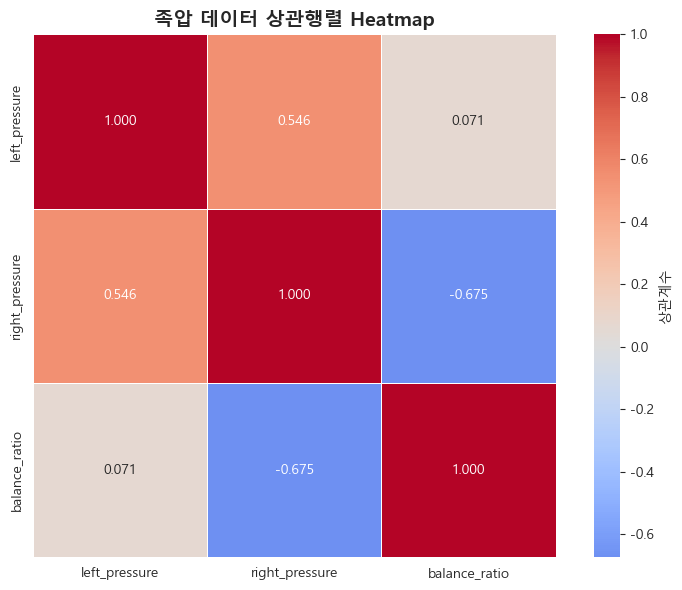

In [ ]:
# 상관행렬 Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix,
            annot=True,
            fmt='.3f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'label': '상관계수'})
plt.title('족압 데이터 상관행렬 Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 3.2 발바닥 족압 분포 Heatmap (좌/우 비교)

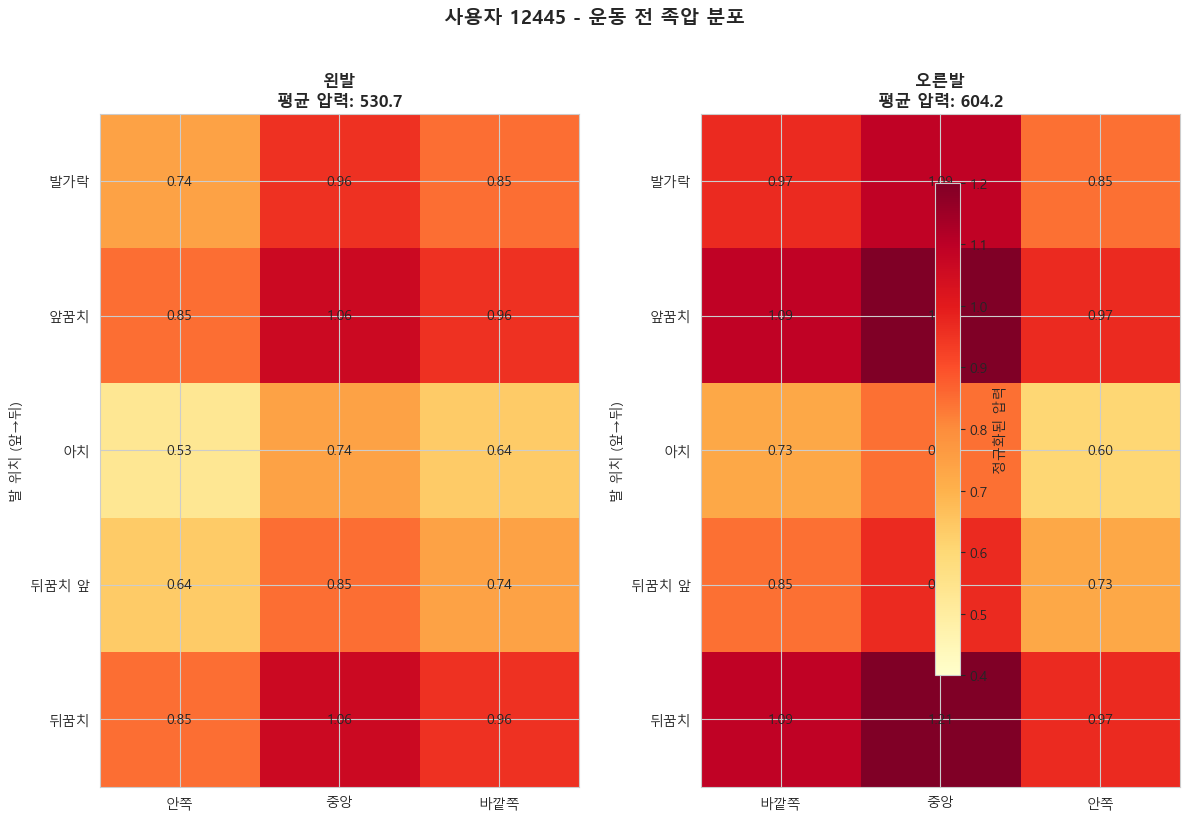

In [ ]:
def create_foot_heatmap(left_pressure, right_pressure, title="족압 분포"):
    """
    발바닥 형태의 족압 Heatmap 생성

    실제 스마트매트에서는 여러 센서 포인트가 있지만,
    여기서는 단순화하여 5x3 그리드로 표현
    """

    # 발바닥 압력 분포 시뮬레이션 (5개 영역: 발가락, 앞꿈치, 중간, 뒤꿈치, 발 아치)
    # 왼발
    left_foot = np.array([
        [0.7, 0.9, 0.8],  # 발가락
        [0.8, 1.0, 0.9],  # 앞꿈치
        [0.5, 0.7, 0.6],  # 중간 (아치 부분, 압력 낮음)
        [0.6, 0.8, 0.7],  # 뒤꿈치 앞
        [0.8, 1.0, 0.9]   # 뒤꿈치
    ]) * (left_pressure / 500)  # 평균 압력으로 정규화

    # 오른발
    right_foot = np.array([
        [0.8, 0.9, 0.7],  # 발가락
        [0.9, 1.0, 0.8],  # 앞꿈치
        [0.6, 0.7, 0.5],  # 중간 (아치 부분)
        [0.7, 0.8, 0.6],  # 뒤꿈치 앞
        [0.9, 1.0, 0.8]   # 뒤꿈치
    ]) * (right_pressure / 500)

    # 시각화
    fig, axes = plt.subplots(1, 2, figsize=(12, 8))

    # 왼발
    im1 = axes[0].imshow(left_foot, cmap='YlOrRd', aspect='auto', vmin=0.4, vmax=1.2)
    axes[0].set_title(f'왼발\n평균 압력: {left_pressure:.1f}', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('발 위치 (앞→뒤)')
    axes[0].set_yticks([0, 1, 2, 3, 4])
    axes[0].set_yticklabels(['발가락', '앞꿈치', '아치', '뒤꿈치 앞', '뒤꿈치'])
    axes[0].set_xticks([0, 1, 2])
    axes[0].set_xticklabels(['안쪽', '중앙', '바깥쪽'])

    # 각 셀에 값 표시
    for i in range(5):
        for j in range(3):
            axes[0].text(j, i, f'{left_foot[i,j]:.2f}', ha='center', va='center', fontsize=10)

    # 오른발
    im2 = axes[1].imshow(right_foot, cmap='YlOrRd', aspect='auto', vmin=0.4, vmax=1.2)
    axes[1].set_title(f'오른발\n평균 압력: {right_pressure:.1f}', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('발 위치 (앞→뒤)')
    axes[1].set_yticks([0, 1, 2, 3, 4])
    axes[1].set_yticklabels(['발가락', '앞꿈치', '아치', '뒤꿈치 앞', '뒤꿈치'])
    axes[1].set_xticks([0, 1, 2])
    axes[1].set_xticklabels(['바깥쪽', '중앙', '안쪽'])  # 오른발은 좌우 반전

    for i in range(5):
        for j in range(3):
            axes[1].text(j, i, f'{right_foot[i,j]:.2f}', ha='center', va='center', fontsize=10)

    # 컬러바
    fig.colorbar(im2, ax=axes, label='정규화된 압력', shrink=0.8)

    plt.suptitle(title, fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()


sample_user = df['user_id'].unique()[0]

# 특정 사용자의 운동 전 데이터로 시각화
user1_before = df[(df['user_id'] == sample_user) & (df['condition'] == 'before')].iloc[0]
create_foot_heatmap(user1_before['left_pressure'], user1_before['right_pressure'],
                    title=f"사용자 {sample_user} - 운동 전 족압 분포")

### 3.3 운동 전/후 족압 비교 Heatmap

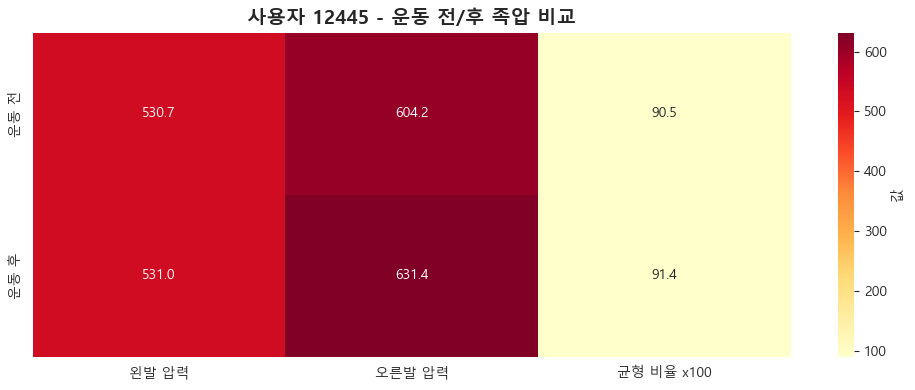

균형 개선도: 0.0090
운동 전 등급: A → 운동 후 등급: D


In [ ]:
def create_before_after_heatmap(df, user_id):
    """
    특정 사용자의 운동 전/후 족압 비교 Heatmap
    """
    before = df[(df['user_id'] == user_id) & (df['condition'] == 'before')].iloc[0]
    after = df[(df['user_id'] == user_id) & (df['condition'] == 'after')].iloc[0]

    # 데이터 준비
    categories = ['왼발 압력', '오른발 압력', '균형 비율 x100']
    before_values = [before['left_pressure'], before['right_pressure'], before['balance_ratio'] * 100]
    after_values = [after['left_pressure'], after['right_pressure'], after['balance_ratio'] * 100]

    # Heatmap용 데이터
    heatmap_data = np.array([before_values, after_values])

    # 시각화
    fig, ax = plt.subplots(figsize=(10, 4))

    im = sns.heatmap(heatmap_data,
                     annot=True,
                     fmt='.1f',
                     cmap='YlOrRd',
                     xticklabels=categories,
                     yticklabels=['운동 전', '운동 후'],
                     cbar_kws={'label': '값'},
                     ax=ax)

    plt.title(f'사용자 {user_id} - 운동 전/후 족압 비교', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # 개선도 출력
    balance_improvement = abs(before['balance_ratio'] - 1.0) - abs(after['balance_ratio'] - 1.0)
    print(f"균형 개선도: {balance_improvement:.4f}")
    print(f"운동 전 등급: {before['grade']} → 운동 후 등급: {after['grade']}")


# 사용자 1의 운동 전/후 비교
create_before_after_heatmap(df, user_id=sample_user)

### 3.4 Boxplot과 Violin Plot

#### Boxplot 구성 요소

Boxplot은 데이터 분포를 5개의 요약 통계량으로 표현:

| 요소 | 설명 |
|------|------|
| **상단 수염** | 최대값 (또는 Q3 + 1.5×IQR 이내 최대) |
| **Q3 (상자 상단)** | 75번째 백분위수 |
| **중앙선** | 중앙값 (Median, 50번째 백분위수) |
| **Q1 (상자 하단)** | 25번째 백분위수 |
| **하단 수염** | 최소값 (또는 Q1 - 1.5×IQR 이내 최소) |
| **점 (●)** | 이상치 (Outlier) - IQR 범위 밖 |

> **IQR (Interquartile Range)** = Q3 - Q1

#### Violin Plot

- Boxplot + 밀도 추정(KDE) 결합
- 분포의 형태를 직관적으로 파악 가능
- 양쪽 대칭 형태로 밀도 표시

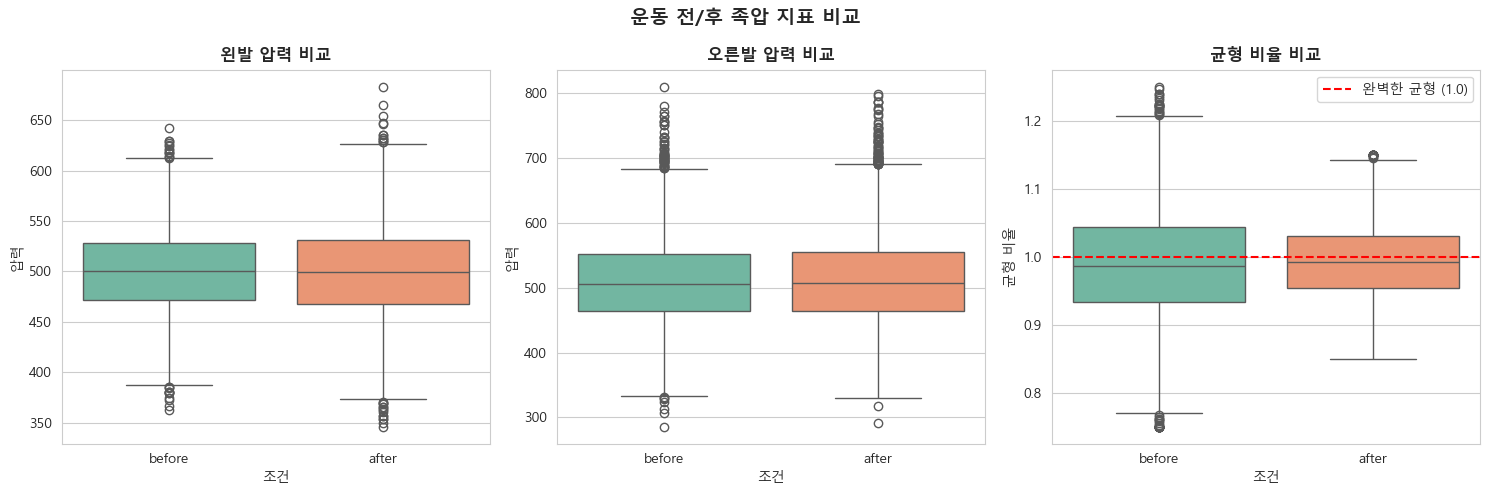

In [ ]:
# 운동 전/후 균형 비율 비교 Boxplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. 왼발 압력
sns.boxplot(data=df, x='condition', y='left_pressure', ax=axes[0], palette='Set2')
axes[0].set_title('왼발 압력 비교', fontsize=12, fontweight='bold')
axes[0].set_xlabel('조건')
axes[0].set_ylabel('압력')

# 2. 오른발 압력
sns.boxplot(data=df, x='condition', y='right_pressure', ax=axes[1], palette='Set2')
axes[1].set_title('오른발 압력 비교', fontsize=12, fontweight='bold')
axes[1].set_xlabel('조건')
axes[1].set_ylabel('압력')

# 3. 균형 비율
sns.boxplot(data=df, x='condition', y='balance_ratio', ax=axes[2], palette='Set2')
axes[2].axhline(y=1.0, color='red', linestyle='--', label='완벽한 균형 (1.0)')
axes[2].set_title('균형 비율 비교', fontsize=12, fontweight='bold')
axes[2].set_xlabel('조건')
axes[2].set_ylabel('균형 비율')
axes[2].legend()

plt.suptitle('운동 전/후 족압 지표 비교', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

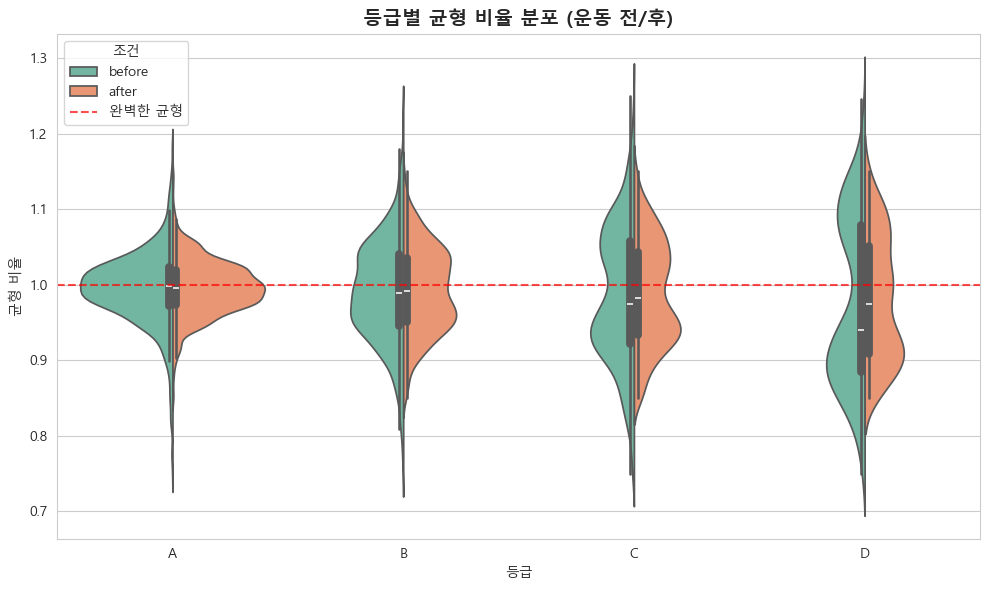

In [ ]:
# 등급별 균형 비율 분포
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='grade', y='balance_ratio', hue='condition',
               split=True, palette='Set2', order=['A', 'B', 'C', 'D'])
plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.7, label='완벽한 균형')
plt.title('등급별 균형 비율 분포 (운동 전/후)', fontsize=14, fontweight='bold')
plt.xlabel('등급')
plt.ylabel('균형 비율')
plt.legend(title='조건')
plt.tight_layout()
plt.show()

### 한번 해보기

**[과제 3-1] 성별에 따른 균형비율 Boxplot** (기초)
- `gender` 컬럼을 기준으로 `balance_ratio` 분포 비교
- Boxplot으로 시각화

**힌트**: `sns.boxplot(data=df, x='gender', y='balance_ratio')`






**[과제 3-2] BMI 카테고리별 압력 Heatmap** (응용)
- `bmi_category`와 `condition`별 평균 `left_pressure` 계산
- 피벗 테이블로 변환 후 Heatmap 시각화

**힌트**: `df.pivot_table(values='left_pressure', index='bmi_category', columns='condition', aggfunc='mean')`

Boxplot과 Violin Plot에서 **운동 후 균형 비율이 1.0에 더 가깝게 모여있는** 패턴 확인

"눈으로 보이는 차이"가 **우연인지, 실제 효과인지**는 시각화만으로 판단 불가

> "이 차이가 우연히 발생할 확률은 얼마나 될까?"

시각화로 발견한 패턴을 통계적으로 검증하는 것이 과학적 분석의 핵심




## 4. 통계 검정 - t-test, ANOVA

### 가설검정

**가설검정(Hypothesis Testing)**: 데이터를 기반으로 **주장의 타당성을 검증**하는 통계적 방법

#### 핵심 개념

| 용어 | 설명 | 예시 |
|------|------|------|
| **귀무가설 (H₀)** | "차이가 없다", "효과가 없다"는 기본 가정 | 운동 전/후 균형 차이가 없다 |
| **대립가설 (H₁)** | "차이가 있다", "효과가 있다"는 연구자의 주장 | 운동 후 균형이 개선되었다 |
| **p-value** | 귀무가설이 참일 때, 관측된 결과가 나올 확률 | p = 0.02 |
| **유의수준 (α)** | 귀무가설을 기각하는 기준 | α = 0.05 (5%) |

### 통계 검정 선택 가이드

| 상황 | 그룹 수 | 반복 측정 | 적합한 검정 |
|------|--------|----------|-------------|
| 같은 대상 운동 전/후 | 2 | O | **대응표본 t-검정** |
| 남녀 간 압력 비교 | 2 | X | **독립표본 t-검정** |
| 등급(A/B/C/D)별 비교 | 4 | X | **ANOVA** |

### p-value의 정확한 의미

> **p-value**: "귀무가설이 참이라고 가정했을 때, 현재 관측된 결과(또는 그보다 더 극단적인 결과)가 나올 확률"

#### p-value 해석 기준

| p-value | 해석 | 결론 |
|---------|------|------|
| p < 0.001 | 매우 강한 증거 | H₀ 기각 (***) |
| p < 0.01 | 강한 증거 | H₀ 기각 (**) |
| p < 0.05 | 유의한 증거 | H₀ 기각 (*) |
| p ≥ 0.05 | 불충분한 증거 | H₀ 기각 못함 |

> **주의**: p-value는 "귀무가설이 참일 확률"이 **아님**  
> p-value는 "효과의 크기"도 아님. 표본이 크면 작은 차이도 유의해질 수 있음

### 1종 오류와 2종 오류

| | H₀가 실제로 참 | H₀가 실제로 거짓 |
|---|---|---|
| **H₀ 기각** | **1종 오류 (α)** - 없는 효과를 있다고 | 올바른 결정 |
| **H₀ 채택** | 올바른 결정 | **2종 오류 (β)** - 있는 효과를 없다고 |

### 4.1 정규성 검정

t-검정, ANOVA 등 **모수 검정**은 데이터가 **정규분포를 따른다**고 가정

**Shapiro-Wilk 검정**:
- H₀: 데이터가 정규분포를 따른다
- p ≥ 0.05 → 정규분포를 따름 (모수 검정 가능)
- p < 0.05 → 정규분포를 따르지 않음 (비모수 검정 고려)

In [ ]:
# 정규성 검정 (샘플링하여 수행 - 대용량 데이터)
print("=== 정규성 검정 (Shapiro-Wilk) ===")
print("H0: 데이터가 정규분포를 따른다")
print("p < 0.05 → 정규분포를 따르지 않음\n")

# 대용량 데이터이므로 샘플링하여 검정
sample_size = min(5000, len(df_wide))
sample_idx = np.random.choice(len(df_wide), sample_size, replace=False)

stat_before, p_before = stats.shapiro(df_wide['balance_dev_before'].iloc[sample_idx])
stat_after, p_after = stats.shapiro(df_wide['balance_dev_after'].iloc[sample_idx])

print(f"운동 전 균형 편차: W={stat_before:.4f}, p={p_before:.4f}")
print(f"운동 후 균형 편차: W={stat_after:.4f}, p={p_after:.4f}")
print(f"\n(샘플 크기: {sample_size:,}개)")

=== 정규성 검정 (Shapiro-Wilk) ===
H0: 데이터가 정규분포를 따른다
p < 0.05 → 정규분포를 따르지 않음

운동 전 균형 편차: W=0.9245, p=0.0000
운동 후 균형 편차: W=0.9238, p=0.0000

(샘플 크기: 5,000개)


### 4.2 t-검정의 종류와 선택 기준

**t-검정**: 두 그룹의 **평균 차이**가 통계적으로 유의한지 검정

#### 대응표본 vs 독립표본

| 구분 | 대응표본 t-검정 | 독립표본 t-검정 |
|------|----------------|----------------|
| **상황** | 같은 대상의 두 측정값 | 서로 다른 두 그룹 |
| **예시** | 운동 전/후 비교 | 남녀 비교 |
| **특징** | 개인차 통제 가능 | 그룹 간 독립성 필요 |

#### 검정 선택 흐름

```
그룹 수가 몇 개인가?
├── 2개 → 같은 대상을 반복 측정?
│   ├── YES → 대응표본 t-검정
│   └── NO → 독립표본 t-검정
└── 3개 이상 → ANOVA
```

In [ ]:
# 대응표본 t-검정 (균형 편차 비교)
print("=== 대응표본 t-검정 ===")
print("목적: 운동 전/후 균형 편차가 유의하게 감소했는지 검정")
print()

deviation_before = df_wide['balance_dev_before']
deviation_after = df_wide['balance_dev_after']

# 대응표본 t-검정
t_stat, p_value = stats.ttest_rel(deviation_before, deviation_after)

print(f"운동 전 균형 편차: 평균={deviation_before.mean():.4f}, 표준편차={deviation_before.std():.4f}")
print(f"운동 후 균형 편차: 평균={deviation_after.mean():.4f}, 표준편차={deviation_after.std():.4f}")
print(f"\nt-통계량: {t_stat:.4f}")
print(f"p-value: {p_value:.2e}")
print()

if p_value < 0.05:
    print("결론: p < 0.05 → 귀무가설 기각")
    print("→ 운동 전/후 균형 편차에 통계적으로 유의한 차이가 있음")
else:
    print("결론: p >= 0.05 → 귀무가설 기각 못함")

=== 대응표본 t-검정 ===
목적: 운동 전/후 균형 편차가 유의하게 감소했는지 검정

운동 전 균형 편차: 평균=0.0671, 표준편차=0.0509
운동 후 균형 편차: 평균=0.0455, 표준편차=0.0345

t-통계량: 51.5229
p-value: 0.00e+00

결론: p < 0.05 → 귀무가설 기각
→ 운동 전/후 균형 편차에 통계적으로 유의한 차이가 있음


In [ ]:
# 효과 크기 (Cohen's d) 계산
diff = deviation_before - deviation_after
cohens_d = diff.mean() / diff.std()

print("=== 효과 크기 (Cohen's d) ===")
print(f"Cohen's d: {cohens_d:.4f}")
print()

# 효과 크기 해석
if abs(cohens_d) < 0.2:
    effect_size = "작음 (negligible)"
elif abs(cohens_d) < 0.5:
    effect_size = "작음 (small)"
elif abs(cohens_d) < 0.8:
    effect_size = "중간 (medium)"
else:
    effect_size = "큼 (large)"

print(f"효과 크기 해석: {effect_size}")
print("")
print("참고: |d| < 0.2: 매우 작음, 0.2~0.5: 작음, 0.5~0.8: 중간, > 0.8: 큼")

=== 효과 크기 (Cohen's d) ===
Cohen's d: 0.7286

효과 크기 해석: 중간 (medium)

참고: |d| < 0.2: 매우 작음, 0.2~0.5: 작음, 0.5~0.8: 중간, > 0.8: 큼


### 4.3 대응표본 t-검정 시각화

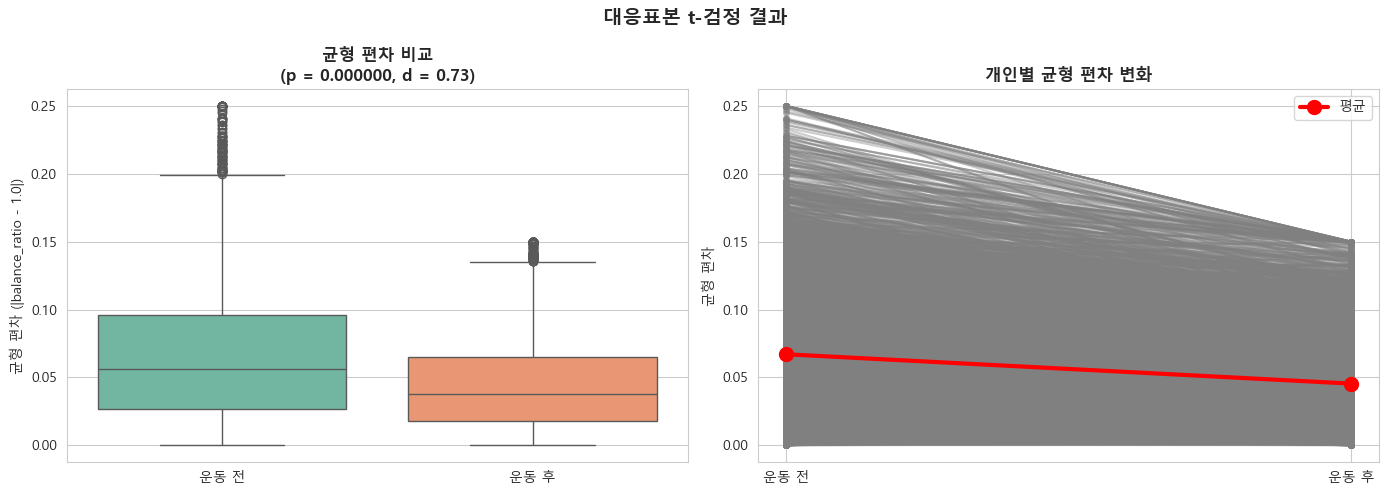

In [ ]:
# 운동 전/후 균형 편차 비교 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 박스플롯
data_to_plot = pd.DataFrame({
    '운동 전': deviation_before,
    '운동 후': deviation_after
})
sns.boxplot(data=data_to_plot, ax=axes[0], palette='Set2')
axes[0].set_title(f'균형 편차 비교\n(p = {p_value:.6f}, d = {cohens_d:.2f})', fontsize=12, fontweight='bold')
axes[0].set_ylabel('균형 편차 (|balance_ratio - 1.0|)')

# 2. 개인별 변화 (Paired Plot)
for i in range(len(deviation_before)):
    axes[1].plot([0, 1], [deviation_before[i], deviation_after[i]],
                 'o-', color='gray', alpha=0.4, markersize=4)

# 평균선
axes[1].plot([0, 1], [deviation_before.mean(), deviation_after.mean()],
             'o-', color='red', linewidth=3, markersize=10, label='평균')

axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['운동 전', '운동 후'])
axes[1].set_title('개인별 균형 편차 변화', fontsize=12, fontweight='bold')
axes[1].set_ylabel('균형 편차')
axes[1].legend()

plt.suptitle('대응표본 t-검정 결과', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 4.4 독립표본 t-검정 (Independent t-test)

**목적**: 운동 전 그룹과 운동 후 그룹의 압력 차이 비교 (독립 표본 가정)

In [ ]:
# 독립표본 t-검정 (왼발 압력 비교)
print("=== 독립표본 t-검정 ===")
print("목적: 운동 전/후 왼발 압력의 차이 검정 (독립 표본 가정)")
print()

left_before = df[df['condition'] == 'before']['left_pressure']
left_after = df[df['condition'] == 'after']['left_pressure']

# 기술통계
print("[기술통계]")
print(f"운동 전 왼발 압력: 평균 = {left_before.mean():.2f}, 표준편차 = {left_before.std():.2f}")
print(f"운동 후 왼발 압력: 평균 = {left_after.mean():.2f}, 표준편차 = {left_after.std():.2f}")
print()

# 독립표본 t-검정
t_stat, p_value = stats.ttest_ind(left_before, left_after)

print("[검정 결과]")
print(f"t-통계량: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print()

# 결론
if p_value < 0.05:
    print("→ 운동 전/후 왼발 압력에 유의한 차이가 있다")
else:
    print("→ 운동 전/후 왼발 압력에 유의한 차이가 없다")
    print("  (압력 자체보다는 좌우 '균형'이 더 중요한 지표)")

=== 독립표본 t-검정 ===
목적: 운동 전/후 왼발 압력의 차이 검정 (독립 표본 가정)

[기술통계]
운동 전 왼발 압력: 평균 = 500.13, 표준편차 = 41.34
운동 후 왼발 압력: 평균 = 499.92, 표준편차 = 47.13

[검정 결과]
t-통계량: 0.2468
p-value: 0.8050

→ 운동 전/후 왼발 압력에 유의한 차이가 없다
  (압력 자체보다는 좌우 '균형'이 더 중요한 지표)


### 4.5 일원분산분석 ANOVA (등급별 비교)

#### ANOVA

**ANOVA (Analysis of Variance)**: **3개 이상 그룹**의 평균이 유의하게 다른지 검정

**가설**:
- H₀: μ₁ = μ₂ = μ₃ = μ₄ (모든 등급의 균형 편차 평균이 동일)
- H₁: 적어도 하나의 등급 평균이 다름

**F-통계량**: 그룹 간 분산 / 그룹 내 분산

In [ ]:
# 균형 편차 계산 (아직 계산되지 않은 경우)
if 'balance_deviation' not in df.columns:
    df['balance_deviation'] = abs(df['balance_ratio'] - 1.0)

print("등급별 기술통계량:")
print(df.groupby('grade')['balance_deviation'].describe())

등급별 기술통계량:
        count      mean       std  min      25%     50%    75%    max
grade                                                                
A      3082.0  0.031222  0.028384  0.0  0.01200  0.0240  0.043  0.250
B      2980.0  0.051268  0.037244  0.0  0.02400  0.0450  0.070  0.248
C      2374.0  0.069898  0.045007  0.0  0.03700  0.0640  0.093  0.250
D      1564.0  0.094405  0.049975  0.0  0.06175  0.0935  0.126  0.250


In [ ]:
# 일원분산분석 (ANOVA)
print("=== 일원분산분석 (ANOVA) ===")
print("목적: 등급(A/B/C/D)에 따라 균형 편차가 유의하게 다른지 검정")
print()

grade_A = df[df['grade'] == 'A']['balance_ratio']
grade_B = df[df['grade'] == 'B']['balance_ratio']
grade_C = df[df['grade'] == 'C']['balance_ratio']
grade_D = df[df['grade'] == 'D']['balance_ratio']

# F-test
f_stat, p_value = stats.f_oneway(grade_A, grade_B, grade_C, grade_D)

print("[검정 결과]")
print(f"F-통계량: {f_stat:.4f}")
print(f"p-value: {p_value:.6f}")
print()

# 결론
if p_value < 0.05:
    print("→ 귀무가설 기각: 등급에 따라 균형 편차에 유의한 차이가 있다")
    print("→ 등급 시스템이 균형 상태를 잘 반영하고 있음!")
    print("→ 사후분석(Post-hoc)으로 어느 그룹 간 차이인지 확인 가능")
else:
    print("→ 귀무가설 기각 못함: 등급별 균형 편차에 유의한 차이가 없다")

=== 일원분산분석 (ANOVA) ===
목적: 등급(A/B/C/D)에 따라 균형 편차가 유의하게 다른지 검정

[검정 결과]
F-통계량: 26.3005
p-value: 0.000000

→ 귀무가설 기각: 등급에 따라 균형 편차에 유의한 차이가 있다
→ 등급 시스템이 균형 상태를 잘 반영하고 있음!
→ 사후분석(Post-hoc)으로 어느 그룹 간 차이인지 확인 가능


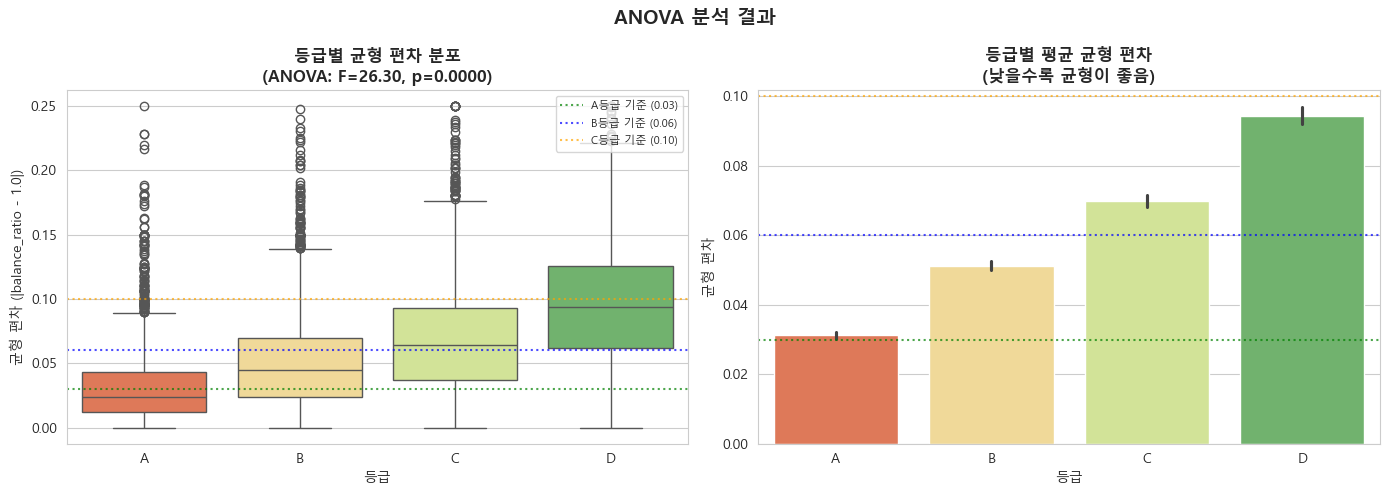

In [ ]:
# ANOVA 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 등급별 균형 편차 Boxplot
sns.boxplot(data=df, x='grade', y='balance_deviation', order=['A', 'B', 'C', 'D'],
            palette='RdYlGn', ax=axes[0])
axes[0].set_title(f'등급별 균형 편차 분포\n(ANOVA: F={f_stat:.2f}, p={p_value:.4f})',
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('등급')
axes[0].set_ylabel('균형 편차 (|balance_ratio - 1.0|)')

# 2. 등급별 평균 균형 편차 Bar Plot
sns.barplot(data=df, x='grade', y='balance_deviation', order=['A', 'B', 'C', 'D'],
            palette='RdYlGn', ax=axes[1], errorbar='ci')
axes[1].set_title('등급별 평균 균형 편차\n(낮을수록 균형이 좋음)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('등급')
axes[1].set_ylabel('균형 편차')

# 등급 기준선 표시
for ax in axes:
    ax.axhline(y=0.03, color='green', linestyle=':', alpha=0.7, label='A등급 기준 (0.03)')
    ax.axhline(y=0.06, color='blue', linestyle=':', alpha=0.7, label='B등급 기준 (0.06)')
    ax.axhline(y=0.10, color='orange', linestyle=':', alpha=0.7, label='C등급 기준 (0.10)')

axes[0].legend(fontsize=8, loc='upper right')

plt.suptitle('ANOVA 분석 결과', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 4.6 사후분석 (Post-hoc Test)

#### 사후분석

ANOVA에서 유의한 차이가 발견되면, **어느 그룹 간에 차이가 있는지** 확인하는 추가 분석

**Tukey HSD (Honest Significant Difference)**:
- 모든 그룹 쌍 비교
- 다중 비교 문제 보정
- 가장 널리 사용되는 사후분석 방법

In [ ]:
# Tukey HSD 사후분석
from scipy.stats import tukey_hsd

print("=== Tukey HSD 사후분석 ===")
print("목적: 어느 등급 간에 유의한 차이가 있는지 확인")
print()

# Tukey HSD
result = tukey_hsd(grade_A, grade_B, grade_C, grade_D)
print("[그룹 비교 결과]")
print("그룹 인덱스: 0=A, 1=B, 2=C, 3=D")
print(result)
print()

# 신뢰구간
print("[95% 신뢰구간]")
ci = result.confidence_interval()
print(ci)

=== Tukey HSD 사후분석 ===
목적: 어느 등급 간에 유의한 차이가 있는지 확인

[그룹 비교 결과]
그룹 인덱스: 0=A, 1=B, 2=C, 3=D
Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.004     0.165    -0.001     0.008
 (0 - 2)      0.009     0.000     0.004     0.014
 (0 - 3)      0.019     0.000     0.013     0.024
 (1 - 0)     -0.004     0.165    -0.008     0.001
 (1 - 2)      0.005     0.040     0.000     0.010
 (1 - 3)      0.015     0.000     0.009     0.021
 (2 - 0)     -0.009     0.000    -0.014    -0.004
 (2 - 1)     -0.005     0.040    -0.010    -0.000
 (2 - 3)      0.010     0.000     0.004     0.016
 (3 - 0)     -0.019     0.000    -0.024    -0.013
 (3 - 1)     -0.015     0.000    -0.021    -0.009
 (3 - 2)     -0.010     0.000    -0.016    -0.004


[95% 신뢰구간]
ConfidenceInterval(low=array([[-0.00463681, -0.00092207,  0.0039594 ,  0.01298768],
       [-0.00843058, -0.0047155 ,  0.00016826,  0.00920096],
       [-0.01390042, -0.01018305, -0.00528318,

In [ ]:
# balance_deviation = |balance_ratio - 1.0| (1.0에서 벗어난 정도)
df_wide['balance_deviation_before'] = abs(df_wide['balance_ratio_before'] - 1.0)
df_wide['balance_deviation_after'] = abs(df_wide['balance_ratio_after'] - 1.0)

### 4.7 통계 검정 결과 요약

In [ ]:
def summarize_statistical_tests():
    """통계 검정 결과 요약 함수"""

    print("="*60)
    print("통계 검정 결과 요약")
    print("="*60)
    print()

    # 데이터 타입 변환 (안전하게)
    dev_before = df_wide['balance_deviation_before'].astype(float).values
    dev_after = df_wide['balance_deviation_after'].astype(float).values
    left_b = df[df['condition'] == 'before']['left_pressure'].astype(float)
    left_a = df[df['condition'] == 'after']['left_pressure'].astype(float)

    # 1. 대응표본 t-검정
    t_paired, p_paired = stats.ttest_rel(dev_before, dev_after)
    print("[1] 대응표본 t-검정 (운동 전/후 균형 편차)")
    print(f"    t = {t_paired:.4f}, p = {p_paired:.6f}")
    print(f"    결론: {'운동 후 균형이 유의하게 개선됨' if p_paired < 0.05 else '유의한 차이 없음'}")
    print()

    # 2. 독립표본 t-검정
    t_ind, p_ind = stats.ttest_ind(left_b, left_a)
    print("[2] 독립표본 t-검정 (운동 전/후 왼발 압력)")
    print(f"    t = {t_ind:.4f}, p = {p_ind:.4f}")
    print(f"    결론: {'유의한 차이 있음' if p_ind < 0.05 else '유의한 차이 없음'}")
    print()

    # 3. ANOVA
    gA = df[df['grade'] == 'A']['balance_deviation'].astype(float)
    gB = df[df['grade'] == 'B']['balance_deviation'].astype(float)
    gC = df[df['grade'] == 'C']['balance_deviation'].astype(float)
    gD = df[df['grade'] == 'D']['balance_deviation'].astype(float)
    f_anova, p_anova = stats.f_oneway(gA, gB, gC, gD)
    print("[3] 일원분산분석 ANOVA (등급별 균형 편차)")
    print(f"    F = {f_anova:.4f}, p = {p_anova:.6f}")
    print(f"    결론: {'등급에 따라 유의한 차이 있음' if p_anova < 0.05 else '유의한 차이 없음'}")
    print()

    print("="*60)
    print("핵심 발견:")
    print("1. 운동 프로그램이 좌우 균형 개선에 효과적임을 통계적으로 확인")
    print("2. 등급 시스템이 균형 상태를 잘 반영하고 있음을 검증")
    print("="*60)

summarize_statistical_tests()

통계 검정 결과 요약

[1] 대응표본 t-검정 (운동 전/후 균형 편차)
    t = 51.5229, p = 0.000000
    결론: 운동 후 균형이 유의하게 개선됨

[2] 독립표본 t-검정 (운동 전/후 왼발 압력)
    t = 0.2468, p = 0.8050
    결론: 유의한 차이 없음

[3] 일원분산분석 ANOVA (등급별 균형 편차)
    F = 1027.0364, p = 0.000000
    결론: 등급에 따라 유의한 차이 있음

핵심 발견:
1. 운동 프로그램이 좌우 균형 개선에 효과적임을 통계적으로 확인
2. 등급 시스템이 균형 상태를 잘 반영하고 있음을 검증


### 한번 해보기

**[과제 4-1] 운동 유형별 ANOVA 수행** (기초)
- `exercise_type`(걷기/달리기/점프/스텝)에 따른 균형 편차 차이 검정
- 일원분산분석(ANOVA) 수행 및 결과 해석

**힌트**:
```python
groups = [df[df['exercise_type'] == ex]['balance_deviation'] for ex in df['exercise_type'].unique()]
stats.f_oneway(*groups)
```


**[과제 4-2] 부상 이력에 따른 t-검정** (응용)
- `injury_history`(True/False)에 따른 균형 편차 차이 검정
- 독립표본 t-검정 수행
- 효과 크기(Cohen's d) 계산 및 해석

**힌트**: `stats.ttest_ind(injured_group, non_injured_group)`

**통계적 결론**:
- **대응표본 t-검정**: p < 0.05 → 운동 전/후 균형 편차에 유의한 차이
- **ANOVA**: p < 0.05 → 등급에 따라 균형 편차에 유의한 차이

**핵심 발견**: 운동 프로그램이 좌우 균형 개선에 통계적으로 유의한 효과가 있음을 확인

통계 분석 코드 작성에 많은 시간 소요. **AI가 코드를 대신 작성해준다면** 어떨까?

> "반복적인 코딩은 AI에게, 해석과 의사결정은 사람에게"


## 5. AI 활용 시각화 고도화

### 5.1 프롬프트 엔지니어링 기본 원칙

AI에게 코드를 요청할 때 **좋은 프롬프트**가 좋은 결과를 생성

#### 효과적인 프롬프트의 4가지 원칙

| 원칙 | 설명 | 예시 |
|------|------|------|
| **구체성** | 데이터 구조와 요구사항을 명확히 | "컬럼: left_pressure (400~600), condition (before/after)" |
| **맥락 제공** | 목적과 배경 설명 | "운동 전/후 균형 개선을 시각화하려 함" |
| **단계적 요청** | 복잡한 작업은 나누어 요청 | "먼저 기본 Heatmap을 만들고, 다음에 스타일 개선" |
| **예시 활용** | 원하는 출력 형태 제시 | "seaborn heatmap 스타일로" |

#### 프롬프트 템플릿

```
[역할] Python 데이터 분석 전문가로서

[배경] {분석 목적 설명}

[데이터]
- 컬럼명: {컬럼 목록}
- 데이터 타입: {타입}
- 값의 범위: {범위}

[요청]
- {구체적인 요구사항 1}
- {구체적인 요구사항 2}

[제약조건]
- 라이브러리: {사용할 라이브러리}
- 언어: 한글 레이블
```

### 5.2 AI 프롬프트 시나리오

ChatGPT나 Claude에게 시각화 코드를 요청할 때 효과적인 프롬프트 예시

| 시나리오 | 프롬프트 핵심 |
|----------|---------------|
| 기본 시각화 | 데이터 구조 + 시각화 유형 |
| 스타일 커스터마이징 | 색상, 폰트, 크기 등 세부 지정 |
| 통계 해석 | 결과값 + 해석 요청 + 대상 독자 수준 |

#### 시나리오 1: 기본 Heatmap 코드 요청

```
Python으로 족압 데이터를 시각화하는 코드를 작성해주세요.

데이터 구조:
- left_pressure: 왼발 평균 압력 (400~600 gf/cm²)
- right_pressure: 오른발 평균 압력 (400~600 gf/cm²)
- balance_ratio: 좌우 균형 비율

요청:
- 상관행렬을 heatmap으로 시각화
- seaborn 라이브러리 사용
- 한글 레이블 적용
```

#### 시나리오 2: 스타일 커스터마이징 요청

```
위에서 만든 heatmap을 전문 보고서에 적합하게 개선해주세요:

- 컬러바에 단위 표시 (압력 단위: gf/cm²)
- 제목과 축 레이블 폰트 크기 조정
- 상관계수 소수점 2자리로 표시
- 색상 팔레트를 Blues로 변경
```

#### 시나리오 3: 통계 해석 요청

```
아래 t-검정 결과를 비전문가가 이해할 수 있도록 해석해주세요:

- 검정 유형: 대응표본 t-검정
- 운동 전 균형 편차: 평균 0.08, 표준편차 0.05
- 운동 후 균형 편차: 평균 0.03, 표준편차 0.02
- t-통계량: 15.24
- p-value: < 0.001

요청:
- 전문 용어 최소화
- 실생활 비유 포함
- 결론을 한 문장으로 요약
```

In [ ]:
df_wide['balance_deviation_before'] = abs(df_wide['balance_ratio_before'] - 1.0)
df_wide['balance_deviation_after']  = abs(df_wide['balance_ratio_after'] - 1.0)
df_wide['balance_improvement']      = df_wide['balance_deviation_before'] - df_wide['balance_deviation_after']

### 5.3 AI 프롬프트 실습 - 고급 시각화 코드

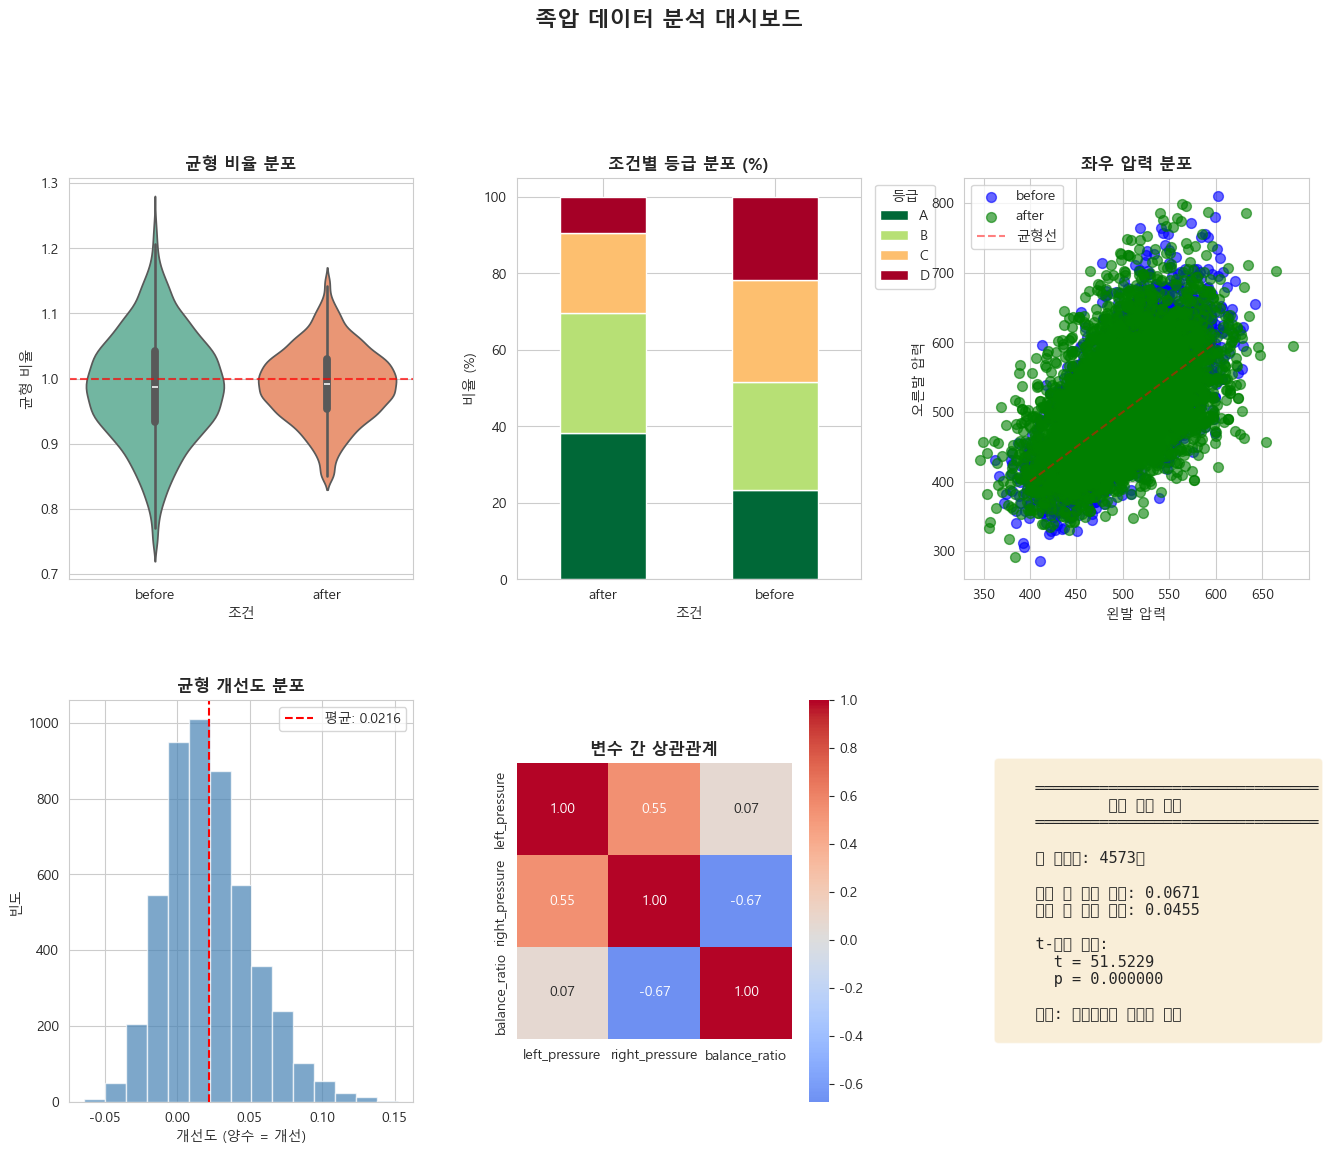

In [ ]:
# AI 프롬프트로 생성할 수 있는 고급 시각화 예시

def create_professional_dashboard(df, df_wide):
    """
    전문 보고서용 종합 대시보드 생성
# 기본 스타일 설정
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100
    (AI 프롬프트로 생성 가능한 코드 예시)
    """

    fig = plt.figure(figsize=(16, 12))

    # 레이아웃 설정 (2x3 그리드)
    gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

    # 1. 운동 전/후 균형 비율 분포 (Violin Plot)
    ax1 = fig.add_subplot(gs[0, 0])
    sns.violinplot(data=df, x='condition', y='balance_ratio',
                   palette='Set2', ax=ax1)
    ax1.axhline(y=1.0, color='red', linestyle='--', alpha=0.7)
    ax1.set_title('균형 비율 분포', fontsize=12, fontweight='bold')
    ax1.set_xlabel('조건')
    ax1.set_ylabel('균형 비율')

    # 2. 등급별 분포 (Stacked Bar)
    ax2 = fig.add_subplot(gs[0, 1])
    grade_cond = pd.crosstab(df['condition'], df['grade'], normalize='index') * 100
    grade_cond[['A', 'B', 'C', 'D']].plot(kind='bar', stacked=True,
                                           ax=ax2, colormap='RdYlGn_r')
    ax2.set_title('조건별 등급 분포 (%)', fontsize=12, fontweight='bold')
    ax2.set_xlabel('조건')
    ax2.set_ylabel('비율 (%)')
    ax2.legend(title='등급', bbox_to_anchor=(1.02, 1))
    ax2.set_xticklabels(['after', 'before'], rotation=0)

    # 3. 좌우 압력 산점도
    ax3 = fig.add_subplot(gs[0, 2])
    for cond, color in [('before', 'blue'), ('after', 'green')]:
        subset = df[df['condition'] == cond]
        ax3.scatter(subset['left_pressure'], subset['right_pressure'],
                    c=color, alpha=0.6, label=cond, s=50)
    # 대각선 (완벽한 균형)
    ax3.plot([400, 600], [400, 600], 'r--', alpha=0.5, label='균형선')
    ax3.set_title('좌우 압력 분포', fontsize=12, fontweight='bold')
    ax3.set_xlabel('왼발 압력')
    ax3.set_ylabel('오른발 압력')
    ax3.legend()

    # 4. 개인별 개선도 히스토그램
    ax4 = fig.add_subplot(gs[1, 0])
    improvement = df_wide['balance_improvement']
    ax4.hist(improvement, bins=15, color='steelblue', edgecolor='white', alpha=0.7)
    ax4.axvline(x=improvement.mean(), color='red', linestyle='--',
                label=f'평균: {improvement.mean():.4f}')
    ax4.set_title('균형 개선도 분포', fontsize=12, fontweight='bold')
    ax4.set_xlabel('개선도 (양수 = 개선)')
    ax4.set_ylabel('빈도')
    ax4.legend()

    # 5. 상관행렬 Heatmap
    ax5 = fig.add_subplot(gs[1, 1])
    corr = df[['left_pressure', 'right_pressure', 'balance_ratio']].corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, ax=ax5, square=True)
    ax5.set_title('변수 간 상관관계', fontsize=12, fontweight='bold')

    # 6. 주요 통계 요약 텍스트
    ax6 = fig.add_subplot(gs[1, 2])
    ax6.axis('off')

    # 통계 요약 계산
    t_stat, p_val = stats.ttest_rel(df_wide['balance_deviation_before'],
                               df_wide['balance_deviation_after'])

    summary_text = f"""
    ═══════════════════════════════
            분석 결과 요약
    ═══════════════════════════════

    총 참가자: {df['user_id'].nunique()}명

    운동 전 균형 편차: {df_wide['balance_deviation_before'].mean():.4f}
    운동 후 균형 편차: {df_wide['balance_deviation_after'].mean():.4f}

    t-검정 결과:
      t = {t_stat:.4f}
      p = {p_val:.6f}

    결론: {'통계적으로 유의한 개선' if p_val < 0.05 else '유의한 차이 없음'}
    """

    ax6.text(0.1, 0.5, summary_text, fontsize=11, family='monospace',
             verticalalignment='center', transform=ax6.transAxes,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.suptitle('족압 데이터 분석 대시보드', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()


# 대시보드 생성
create_professional_dashboard(df, df_wide)

### 5.4 AI 활용 팁

**효과적인 프롬프트 작성법**:

1. **데이터 구조 명시**: 컬럼명, 데이터 타입, 값의 범위를 구체적으로 설명
2. **요구사항 구체화**: "예쁘게"보다 "파란색 계열, 제목 20pt"처럼 명시
3. **단계적 접근**: 한 번에 모든 것을 요청하지 말고 점진적으로 개선
4. **검증 필수**: AI가 생성한 코드는 반드시 직접 실행하여 확인

**주의사항**:
- AI가 생성한 코드는 **반드시 검증** 필요
- 코드가 오류 없이 실행되는지 확인
- 결과가 기대한 것과 일치하는지 확인
- 데이터가 정확하게 반영되었는지 확인

### 5.5 보고서 작성 기능

분석이 완료되면 결과를 체계적으로 정리하여 보고서로 작성.

In [ ]:
def generate_analysis_report(df, df_wide):
    """
    분석 결과 자동 요약 보고서 생성
    """

    # 기본 통계
    n_users = df['user_id'].nunique()
    n_records = len(df)

    # 운동 전/후 통계
    before_mean = df[df['condition'] == 'before']['balance_ratio'].mean()
    after_mean = df[df['condition'] == 'after']['balance_ratio'].mean()

    # 균형 편차
    dev_before = df_wide['balance_deviation_before'].mean()
    dev_after = df_wide['balance_deviation_after'].mean()
    improvement_rate = (dev_before - dev_after) / dev_before * 100

    # t-검정
    t_stat, p_value = stats.ttest_rel(df_wide['balance_deviation_before'],
                                 df_wide['balance_deviation_after'])

    # 등급 변화
    grade_before = df[df['condition'] == 'before']['grade'].value_counts()
    grade_after = df[df['condition'] == 'after']['grade'].value_counts()

    report = f"""
╔══════════════════════════════════════════════════════════════╗
║              족압 데이터 분석 보고서                           ║
╠══════════════════════════════════════════════════════════════╣

1. 데이터 개요
   - 분석 대상: {n_users}명의 사용자
   - 총 데이터: {n_records}건 (운동 전/후 각 {n_users}건)

2. 균형 비율 분석
   - 운동 전 평균: {before_mean:.4f} (완벽한 균형 = 1.0)
   - 운동 후 평균: {after_mean:.4f}

3. 균형 개선도
   - 운동 전 평균 편차: {dev_before:.4f}
   - 운동 후 평균 편차: {dev_after:.4f}
   - 개선율: {improvement_rate:.1f}%

4. 통계 검정 결과
   - 검정 방법: 대응표본 t-검정
   - t-통계량: {t_stat:.4f}
   - p-value: {p_value:.6f}
   - 결론: {'통계적으로 유의한 개선 (p < 0.05)' if p_value < 0.05 else '유의한 차이 없음'}

5. 등급 분포 변화
   - 운동 전: A({grade_before.get('A', 0)}), B({grade_before.get('B', 0)}), C({grade_before.get('C', 0)}), D({grade_before.get('D', 0)})
   - 운동 후: A({grade_after.get('A', 0)}), B({grade_after.get('B', 0)}), C({grade_after.get('C', 0)}), D({grade_after.get('D', 0)})

6. 핵심 결론
   운동 프로그램 참여 후 좌우 균형이 평균 {improvement_rate:.1f}% 개선되었으며,
   이는 통계적으로 유의한 수준입니다 (p = {p_value:.6f}).
   A등급 비율이 운동 전 {grade_before.get('A', 0)/n_users*100:.0f}%에서
   운동 후 {grade_after.get('A', 0)/n_users*100:.0f}%로 증가하였습니다.

╚══════════════════════════════════════════════════════════════╝
    """

    return report


# 보고서 생성 및 출력
report = generate_analysis_report(df, df_wide)
print(report)


╔══════════════════════════════════════════════════════════════╗
║              족압 데이터 분석 보고서                           ║
╠══════════════════════════════════════════════════════════════╣

1. 데이터 개요
   - 분석 대상: 4573명의 사용자
   - 총 데이터: 10000건 (운동 전/후 각 4573건)

2. 균형 비율 분석
   - 운동 전 평균: 0.9868 (완벽한 균형 = 1.0)
   - 운동 후 평균: 0.9918

3. 균형 개선도
   - 운동 전 평균 편차: 0.0671
   - 운동 후 평균 편차: 0.0455
   - 개선율: 32.2%

4. 통계 검정 결과
   - 검정 방법: 대응표본 t-검정
   - t-통계량: 51.5229
   - p-value: 0.000000
   - 결론: 통계적으로 유의한 개선 (p < 0.05)

5. 등급 분포 변화
   - 운동 전: A(1167), B(1416), C(1327), D(1090)
   - 운동 후: A(1915), B(1564), C(1047), D(474)

6. 핵심 결론
   운동 프로그램 참여 후 좌우 균형이 평균 32.2% 개선되었으며,
   이는 통계적으로 유의한 수준입니다 (p = 0.000000).
   A등급 비율이 운동 전 26%에서 
   운동 후 42%로 증가하였습니다.

╚══════════════════════════════════════════════════════════════╝
    


### 5.6 통계 결과 보고 형식 (APA 스타일)

학술 논문이나 전문 보고서에서는 통계 결과를 **APA 스타일**로 보고

#### APA 스타일 통계 보고 예시

**t-검정**:
> *t*(28) = 15.24, *p* < .001, *d* = 1.85

**ANOVA**:
> *F*(3, 56) = 12.45, *p* = .002, η² = .40

**상관분석**:
> *r*(58) = .72, *p* < .001

### 한번 해보기

**[과제 5-1] AI로 Violin Plot 생성 프롬프트 작성** (기초)
- 연령대별 균형 비율 분포를 Violin Plot으로 시각화하는 프롬프트 작성
- 데이터 구조, 요구사항, 스타일을 명확히 기술

**작성 요소**:
1. 데이터 설명 (컬럼명, 타입, 값의 범위)
2. 시각화 요구사항 (차트 유형, 색상, 레이블)
3. 제약조건 (라이브러리, 한글 폰트)




**[과제 5-2] 대시보드 코드 수정 요청 프롬프트** (응용)
- 기존 시각화 코드를 수정하는 프롬프트 작성
- "성별 비교 추가", "색상 변경", "서브플롯 배치 변경" 등 구체적 요청

**작성 요소**:
1. 기존 코드 제공
2. 수정 요청사항 구체화
3. 기대 결과 명시

5장까지 통계적 방법으로 "차이가 있는가?"를 검증. AI 도구를 활용하여 코드 생성과 보고서 작성을 효율화

이제 한 단계 더 나아가 **예측의 영역**으로 진입

> "차이를 확인했다면, 이제 **예측**할 수 있는가?"


## 6. 머신러닝 입문 - 회귀와 분류

통계 검정을 통해 "운동 전/후 차이가 유의한가?"를 검증하였음. 이제 한 단계 더 나아가 **예측 모델** 구축

### 6.1 통계 분석에서 머신러닝으로의 전환

| 구분 | 통계 분석 | 머신러닝 |
|------|----------|----------|
| **질문** | "차이가 있는가?" | "예측할 수 있는가?" |
| **목적** | 가설 검증 | 예측 모델 |
| **방법** | t-test, ANOVA | 회귀, 분류, 클러스터링 |
| **해석** | 인과 추론 중심 | 예측 성능 중심 |

### 회귀 vs 분류

| 구분 | 회귀 (Regression) | 분류 (Classification) |
|------|-------------------|----------------------|
| **목표** | 연속형 값 예측 | 범주 예측 |
| **예시** | 균형 비율 예측 (0.95, 1.02) | 등급 예측 (A/B/C/D) |
| **출력** | 실수 | 범주형 라벨 |
| **평가지표** | MSE, R² | Accuracy, F1-Score |

### 로지스틱 회귀

- 이름은 "회귀"지만 실제로는 **분류** 알고리즘
- **이진 분류**에 주로 사용 (예: A등급 vs 비-A등급)
- 확률을 출력 (0~1 사이 값)
- **시그모이드(Sigmoid) 함수** 사용

**수식**: P(Y=1|X) = 1 / (1 + e^(-z)), 여기서 z = β₀ + β₁x₁ + β₂x₂ + ...

> **핵심**: 로지스틱 회귀는 "이 데이터가 A등급일 확률은 얼마인가?"를 계산

### 6.2 머신러닝 라이브러리 준비

In [ ]:
# 머신러닝 라이브러리 임포트
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

print("scikit-learn 라이브러리 로드 완료!")
print("사용할 모듈: train_test_split, LogisticRegression, accuracy_score")

scikit-learn 라이브러리 로드 완료!
사용할 모듈: train_test_split, LogisticRegression, accuracy_score


### 6.3 데이터 준비: 이진 분류 문제로 변환

로지스틱 회귀는 이진 분류에 적합. 등급 데이터를 **A등급(1) vs 비-A등급(0)** 으로 변환

**목표**: 족압 데이터(균형 비율, 좌우 압력)를 기반으로 A등급 여부 예측

In [ ]:
# 이진 분류 타겟 생성: A등급(1) vs 비-A등급(0)
df['is_grade_A'] = (df['grade'] == 'A').astype(int)

print("=== 타겟 변수 분포 ===")
print(df['is_grade_A'].value_counts())
print(f"\nA등급 비율: {df['is_grade_A'].mean():.1%}")

# 피처(독립변수) 선택
features = ['left_pressure', 'right_pressure', 'balance_ratio']
X = df[features]
y = df['is_grade_A']

print(f"\n피처(X) 형태: {X.shape}")
print(f"타겟(y) 형태: {y.shape}")

=== 타겟 변수 분포 ===
is_grade_A
0    6918
1    3082
Name: count, dtype: int64

A등급 비율: 30.8%

피처(X) 형태: (10000, 3)
타겟(y) 형태: (10000,)


### 6.4 학습/테스트 데이터 분할

**데이터 분할 이유**: 머신러닝 모델이 **새로운 데이터에서도 잘 작동하는지** 확인

```
전체 데이터 (100%)
├── 학습 데이터 (70%): 모델 훈련에 사용
└── 테스트 데이터 (30%): 모델 평가에 사용
```

> **주의**: 테스트 데이터는 모델 학습에 절대 사용하지 않음 (데이터 누수 방지)

In [ ]:
# 학습/테스트 데이터 분할 (70:30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,      # 테스트 데이터 30%
    random_state=42,    # 재현성을 위한 시드
    stratify=y          # 클래스 비율 유지
)

print("=== 데이터 분할 결과 ===")
print(f"학습 데이터: {len(X_train)}개")
print(f"테스트 데이터: {len(X_test)}개")
print(f"\n학습 데이터 A등급 비율: {y_train.mean():.1%}")
print(f"테스트 데이터 A등급 비율: {y_test.mean():.1%}")

=== 데이터 분할 결과 ===
학습 데이터: 7000개
테스트 데이터: 3000개

학습 데이터 A등급 비율: 30.8%
테스트 데이터 A등급 비율: 30.8%


### 6.5 로지스틱 회귀 모델 학습

In [ ]:
# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("=== 모델 학습 완료! ===")
print(f"학습에 사용된 피처: {features}")

# 예측 수행
y_pred = model.predict(X_test)           # 클래스 예측 (0 또는 1)
y_prob = model.predict_proba(X_test)[:, 1]  # A등급일 확률

print(f"\n예측 완료: {len(y_pred)}개 샘플")

=== 모델 학습 완료! ===
학습에 사용된 피처: ['left_pressure', 'right_pressure', 'balance_ratio']

예측 완료: 3000개 샘플


### 6.6 모델 성능 평가

**정확도(Accuracy)**: 전체 예측 중 맞춘 비율

```
정확도 = (맞춘 예측 수) / (전체 예측 수)
```

In [ ]:
# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

print("=== 모델 성능 평가 ===")
print(f"정확도 (Accuracy): {accuracy:.2%}")
print()

# 분류 보고서 (정밀도, 재현율, F1-점수)
print("=== 분류 보고서 ===")
print(classification_report(y_test, y_pred, target_names=['Non-A (0)', 'A (1)']))

=== 모델 성능 평가 ===
정확도 (Accuracy): 69.17%

=== 분류 보고서 ===
              precision    recall  f1-score   support

   Non-A (0)       0.69      1.00      0.82      2075
       A (1)       0.00      0.00      0.00       925

    accuracy                           0.69      3000
   macro avg       0.35      0.50      0.41      3000
weighted avg       0.48      0.69      0.57      3000



### 6.7 혼동 행렬 (Confusion Matrix)

**혼동 행렬**: 분류 모델의 예측 결과를 2x2 표로 정리

```
                   예측
             Positive  Negative
실제 Positive   TP        FN
     Negative   FP        TN
```

- **TP (True Positive)**: 실제 A등급을 A등급으로 예측
- **TN (True Negative)**: 실제 비-A등급을 비-A등급으로 예측
- **FP (False Positive)**: 실제 비-A등급을 A등급으로 예측 (1종 오류)
- **FN (False Negative)**: 실제 A등급을 비-A등급으로 예측 (2종 오류)

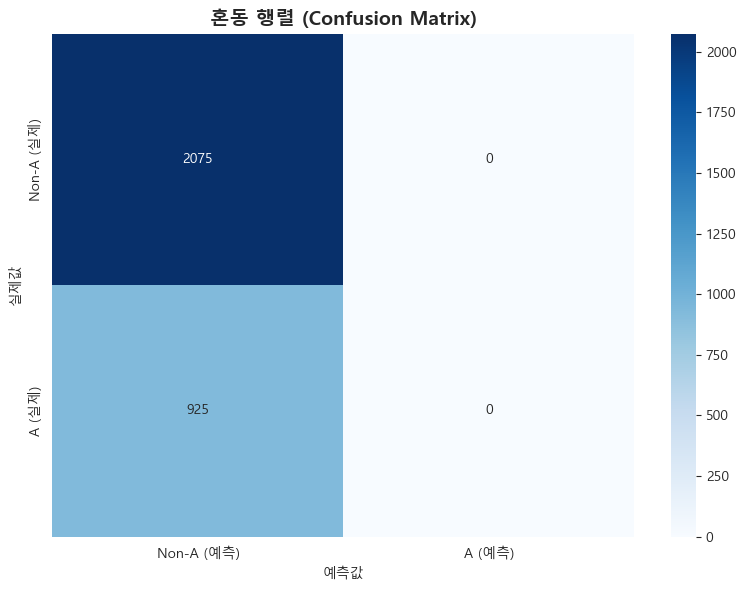


True Negative (Non-A를 Non-A로): 2075
False Positive (Non-A를 A로): 0
False Negative (A를 Non-A로): 925
True Positive (A를 A로): 0


In [ ]:
# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-A (예측)', 'A (예측)'],
            yticklabels=['Non-A (실제)', 'A (실제)'])
plt.title('혼동 행렬 (Confusion Matrix)', fontsize=14, fontweight='bold')
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.tight_layout()
plt.show()

# 해석
tn, fp, fn, tp = cm.ravel()
print(f"\nTrue Negative (Non-A를 Non-A로): {tn}")
print(f"False Positive (Non-A를 A로): {fp}")
print(f"False Negative (A를 Non-A로): {fn}")
print(f"True Positive (A를 A로): {tp}")

### 6.8 회귀 계수 해석: 오즈비 (Odds Ratio)

로지스틱 회귀의 장점: **해석 가능성**. 각 변수가 결과에 미치는 영향을 **오즈비(OR)** 로 표현 가능

**오즈비 해석**:
- OR = 1: 변수가 결과에 영향 없음
- OR > 1: 변수가 1 증가하면 A등급일 확률 증가
- OR < 1: 변수가 1 증가하면 A등급일 확률 감소

**예시**: OR = 2.5 → 해당 변수가 1 증가하면 A등급일 오즈가 2.5배

In [ ]:
# 회귀 계수와 오즈비 계산
coef_df = pd.DataFrame({
    '변수': features,
    '회귀 계수 (β)': model.coef_[0],
    '오즈비 (OR)': np.exp(model.coef_[0])
})

print("=== 로지스틱 회귀 계수 및 오즈비 ===")
print(coef_df.round(4))
print(f"\n절편 (Intercept): {model.intercept_[0]:.4f}")

# 해석
print("\n=== 해석 ===")
for i, row in coef_df.iterrows():
    var = row['변수']
    OR = row['오즈비 (OR)']
    if OR > 1:
        print(f"• {var}: OR = {OR:.2f} → 1단위 증가 시 A등급 확률 {(OR-1)*100:.1f}% 증가")
    else:
        print(f"• {var}: OR = {OR:.2f} → 1단위 증가 시 A등급 확률 {(1-OR)*100:.1f}% 감소")

=== 로지스틱 회귀 계수 및 오즈비 ===
               변수  회귀 계수 (β)  오즈비 (OR)
0   left_pressure     0.0026    1.0026
1  right_pressure    -0.0031    0.9969
2   balance_ratio    -0.2845    0.7524

절편 (Intercept): -0.2417

=== 해석 ===
• left_pressure: OR = 1.00 → 1단위 증가 시 A등급 확률 0.3% 증가
• right_pressure: OR = 1.00 → 1단위 증가 시 A등급 확률 0.3% 감소
• balance_ratio: OR = 0.75 → 1단위 증가 시 A등급 확률 24.8% 감소


### 6.9 예측 확률 시각화

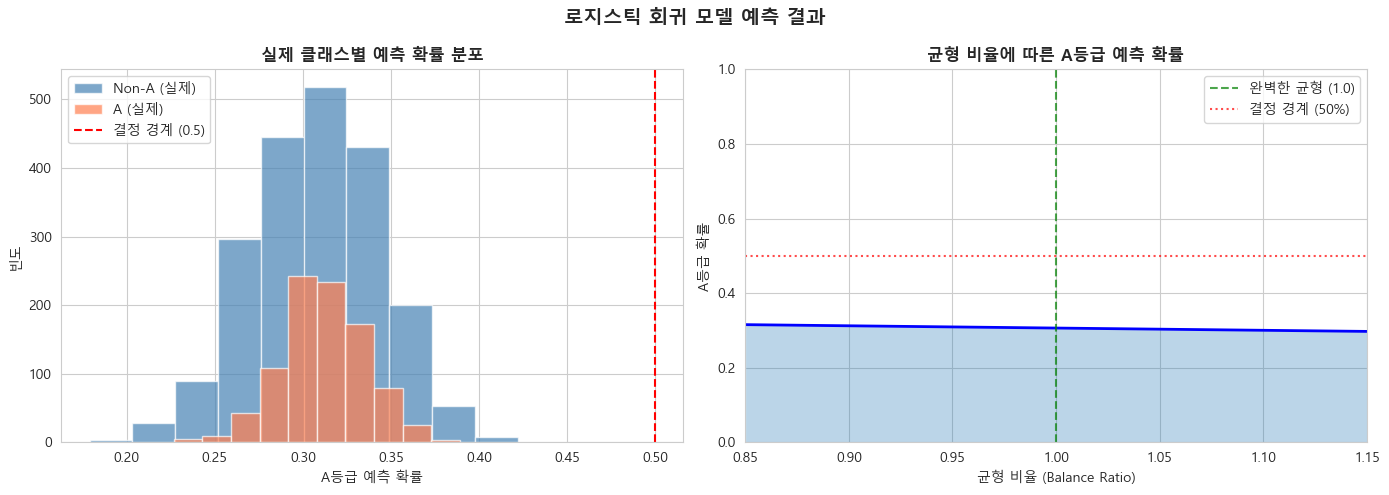

In [ ]:
# 예측 확률 분포 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 실제 클래스별 예측 확률 분포
test_results = pd.DataFrame({
    'actual': y_test.values,
    'prob': y_prob
})

for cls, color in [(0, 'steelblue'), (1, 'coral')]:
    subset = test_results[test_results['actual'] == cls]['prob']
    label = 'Non-A (실제)' if cls == 0 else 'A (실제)'
    axes[0].hist(subset, bins=10, alpha=0.7, color=color, label=label, edgecolor='white')

axes[0].axvline(x=0.5, color='red', linestyle='--', label='결정 경계 (0.5)')
axes[0].set_title('실제 클래스별 예측 확률 분포', fontsize=12, fontweight='bold')
axes[0].set_xlabel('A등급 예측 확률')
axes[0].set_ylabel('빈도')
axes[0].legend()

# 2. 균형 비율에 따른 A등급 확률 (모델 학습 결과)
balance_range = np.linspace(0.85, 1.15, 100)
# 다른 변수는 평균값으로 고정
X_sim = pd.DataFrame({
    'left_pressure': [X['left_pressure'].mean()] * 100,
    'right_pressure': [X['right_pressure'].mean()] * 100,
    'balance_ratio': balance_range
})
prob_sim = model.predict_proba(X_sim)[:, 1]

axes[1].plot(balance_range, prob_sim, 'b-', linewidth=2)
axes[1].axvline(x=1.0, color='green', linestyle='--', alpha=0.7, label='완벽한 균형 (1.0)')
axes[1].axhline(y=0.5, color='red', linestyle=':', alpha=0.7, label='결정 경계 (50%)')
axes[1].fill_between(balance_range, prob_sim, alpha=0.3)
axes[1].set_title('균형 비율에 따른 A등급 예측 확률', fontsize=12, fontweight='bold')
axes[1].set_xlabel('균형 비율 (Balance Ratio)')
axes[1].set_ylabel('A등급 확률')
axes[1].legend()
axes[1].set_xlim(0.85, 1.15)
axes[1].set_ylim(0, 1)

plt.suptitle('로지스틱 회귀 모델 예측 결과', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 6.10 머신러닝 실습 요약

**학습한 머신러닝 개념**:

| 개념 | 설명 |
|------|------|
| **회귀 vs 분류** | 연속값 예측 vs 범주 예측 |
| **로지스틱 회귀** | 시그모이드 함수로 확률 출력 |
| **학습/테스트 분할** | 과적합 방지를 위한 데이터 분리 |
| **혼동 행렬** | 분류 성능의 상세 분석 |
| **오즈비** | 변수 영향력의 해석 가능한 지표 |

### 한번 해보기

**[과제 6-1] B등급 예측 모델 구축** (기초)
- A등급 대신 **B등급(1) vs 비-B등급(0)** 이진 분류 모델 구축
- 동일한 특성(balance_ratio, left_pressure, right_pressure) 사용
- 정확도 및 혼동행렬 출력

**힌트**: `df['is_grade_B'] = (df['grade'] == 'B').astype(int)`







**[과제 6-2] 다중 분류 모델 시도** (응용)
- A/B/C/D 전체 등급을 예측하는 다중 분류 모델 구축
- 로지스틱 회귀의 `multi_class='multinomial'` 옵션 사용
- 분류 보고서(classification_report) 출력

**힌트**:
```python
from sklearn.metrics import classification_report
model = LogisticRegression(multi_class='multinomial', max_iter=1000)
```

**머신러닝 실습 완료**:
- 족압 데이터로 A등급 여부를 예측하는 모델 구축
- 혼동행렬로 모델 성능 평가
- 오즈비로 각 변수의 영향력 해석

학습 내용을 **종합적으로 적용**할 차례

> "배운 것을 직접 해봐야 진짜 내 것이 됨"


## 7. 최종 과제 및 마무리

### 7.1 종합 과제

**과제 데이터**: `foot_pressure_practice.csv` (500만 행, 대용량 족압 데이터)

#### 과제 목표

대용량 족압 데이터를 활용하여 학습 내용을 종합적으로 적용

| 과제 | 내용 | 관련 장 |
|------|------|---------|
| **1. 탐색적 분석** | 연령대별, 성별별 균형 분포 시각화 | 2, 3장 |
| **2. 가설 검정** | "운동 유형에 따라 균형 개선 효과가 다른가?" ANOVA 수행 | 4장 |
| **3. 예측 모델** | 로지스틱 회귀로 등급 예측 모델 구축 | 6장 |
| **4. 보고서 작성** | APA 스타일로 결과 보고 | 5장 |

#### 평가 기준

| 항목 | 배점 | 세부 내용 |
|------|------|----------|
| **EDA** | 20% | 적절한 시각화, 기술통계 |
| **통계 검정** | 30% | 올바른 검정 선택, 사후분석, 해석 |
| **머신러닝** | 30% | 모델 구축, 성능 평가, 오즈비 해석 |
| **보고서** | 20% | 논리적 구성, 결론 도출, APA 스타일 |

### 7.2 데이터 분석 파이프라인 (전체 흐름)

| 단계 | 내용 | 도구 |
|------|------|------|
| 데이터 수집 | 원천 데이터 확보 | CSV, DB, API |
| 전처리 | 정제, 변환 | Pandas |
| 탐색(EDA) | 데이터 이해 | describe(), 시각화 |
| 시각화 | 패턴 발견 | Seaborn, Matplotlib |
| 통계검정 | 가설 검증 | SciPy |
| ML모델 | 예측 | Scikit-learn |
| 보고서 | 결과 전달 | AI 도구 활용 |

### 7.3 학습 내용 핵심 요약

| 장 | 제목 | 핵심 기술 |
|----|------|-----------|
| 1 | 환경 설정 | Python, Pandas, Seaborn |
| 2 | 데이터 전처리 | EDA, pivot() |
| 3 | 시각화 | Heatmap, Boxplot, Violin Plot |
| 4 | 통계 검정 | t-test, ANOVA, 사후분석 |
| 5 | AI 활용 | 프롬프트 엔지니어링, 보고서 |
| 6 | 머신러닝 입문 | 로지스틱 회귀, 혼동행렬, 오즈비 |
| 7 | 최종 과제 | 종합 실습, 마무리 |

## 부록: 덤

### A. 비모수 검정 (정규성 가정 불만족 시)

In [ ]:
# Wilcoxon 부호순위 검정 (대응표본 t-검정의 비모수 대안)
from scipy.stats import wilcoxon

print("=== Wilcoxon 부호순위 검정 ===")
print("(정규성 가정을 만족하지 않을 때 사용)")
print()

stat, p_value = wilcoxon(df_wide['balance_deviation_before'],
                         df_wide['balance_deviation_after'])

print(f"통계량: {stat:.4f}")
print(f"p-value: {p_value:.6f}")
print(f"결론: {'유의한 차이 있음' if p_value < 0.05 else '유의한 차이 없음'}")

=== Wilcoxon 부호순위 검정 ===
(정규성 가정을 만족하지 않을 때 사용)

통계량: 1761112.0000
p-value: 0.000000
결론: 유의한 차이 있음


### B. 데이터 저장 및 내보내기

In [ ]:
# CSV로 저장 (필요시 주석 해제)
# df.to_csv('foot_pressure_data.csv', index=False, encoding='utf-8-sig')
# df_wide.to_csv('foot_pressure_data_wide.csv', encoding='utf-8-sig')
# print("데이터 저장 완료!")

### C. 참고 자료

**라이브러리 문서**:
- [Pandas 공식 문서](https://pandas.pydata.org/docs/)
- [Seaborn 갤러리](https://seaborn.pydata.org/examples/)
- [SciPy 통계 함수](https://docs.scipy.org/doc/scipy/reference/stats.html)
- [Scikit-learn 튜토리얼](https://scikit-learn.org/stable/tutorial/)

In [ ]:

# 기본 스타일 설정
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100